In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

df1 = pd.read_csv("./drive/MyDrive/portsmouth/fetal_health.csv")
COLORS = ['#0000ff', '#800080', '#ff0000']

In [27]:
  df1.head()

baseline value  accelerations  ...  histogram_tendency  fetal_health
0           120.0          0.000  ...                 1.0           2.0
1           132.0          0.006  ...                 0.0           1.0
2           133.0          0.003  ...                 0.0           1.0
3           134.0          0.003  ...                 1.0           1.0
4           132.0          0.007  ...                 1.0           1.0

[5 rows x 22 columns]

In [28]:
df1.describe()

baseline value  accelerations  ...  histogram_tendency  fetal_health
count     2126.000000    2126.000000  ...         2126.000000   2126.000000
mean       133.303857       0.003178  ...            0.320320      1.304327
std          9.840844       0.003866  ...            0.610829      0.614377
min        106.000000       0.000000  ...           -1.000000      1.000000
25%        126.000000       0.000000  ...            0.000000      1.000000
50%        133.000000       0.002000  ...            0.000000      1.000000
75%        140.000000       0.006000  ...            1.000000      1.000000
max        160.000000       0.019000  ...            1.000000      3.000000

[8 rows x 22 columns]

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [30]:
for c in df1.columns:
  print(c)

baseline value
accelerations
fetal_movement
uterine_contractions
light_decelerations
severe_decelerations
prolongued_decelerations
abnormal_short_term_variability
mean_value_of_short_term_variability
percentage_of_time_with_abnormal_long_term_variability
mean_value_of_long_term_variability
histogram_width
histogram_min
histogram_max
histogram_number_of_peaks
histogram_number_of_zeroes
histogram_mode
histogram_mean
histogram_median
histogram_variance
histogram_tendency
fetal_health



Bar graph:


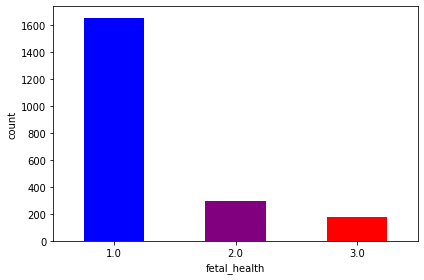


Pie chart:


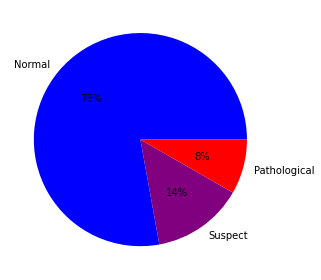


 Correlation heat map:


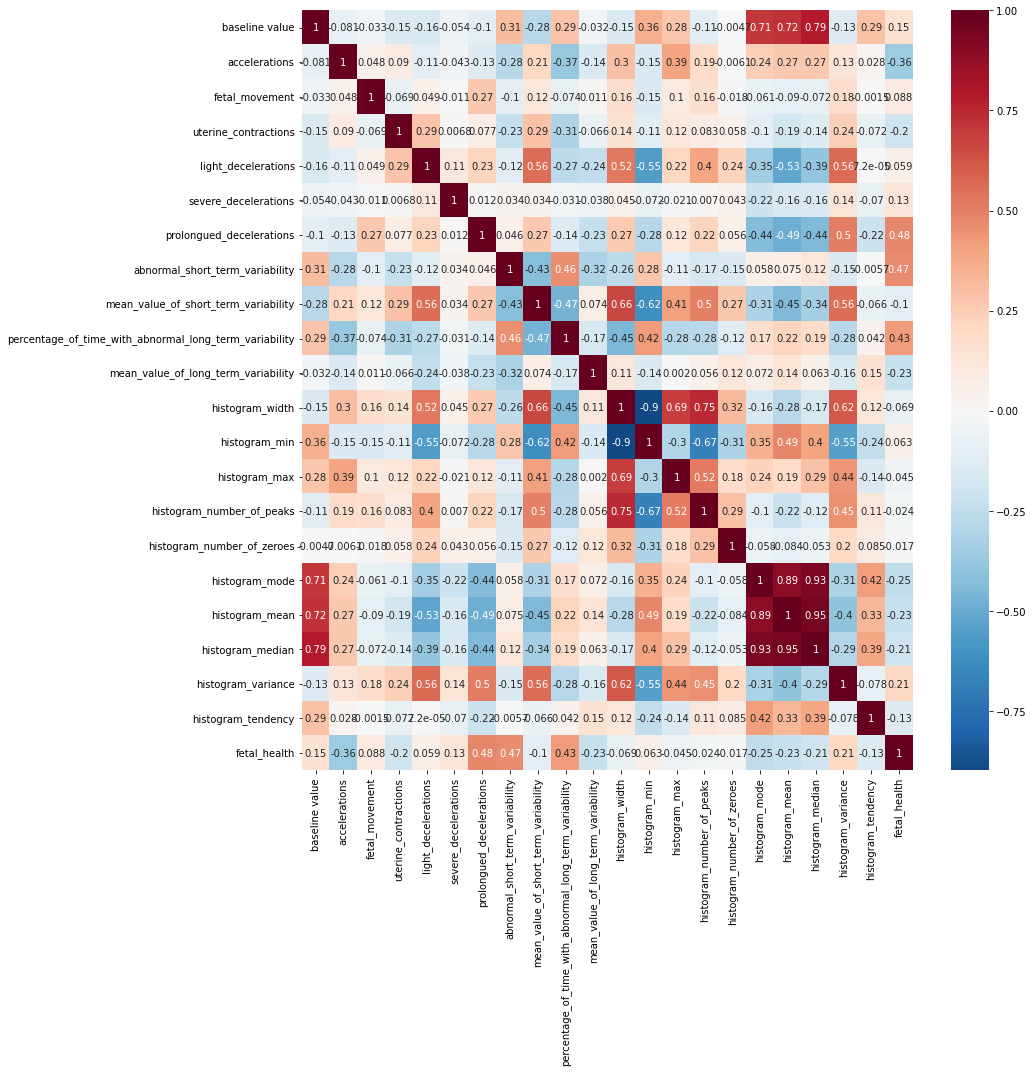

In [31]:
fig1 = plt.figure()
hist = df1['fetal_health'].value_counts()
hist.plot(kind="bar", color=COLORS)
plt.xlabel("fetal_health")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.tight_layout()
print("\nBar graph:")
plt.show()

fig2 = plt.figure()
y_pie = plt.pie(hist, colors=COLORS, labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%",)
plt.tight_layout()
print("\nPie chart:")
plt.show()

fig3 = plt.figure(figsize=(15,15)) 
sns.heatmap(df1.corr(), cmap='RdBu_r', annot=True, center=0)
plt.tight_layout()
print("\n Correlation heat map:")
plt.show()


Boxplots:


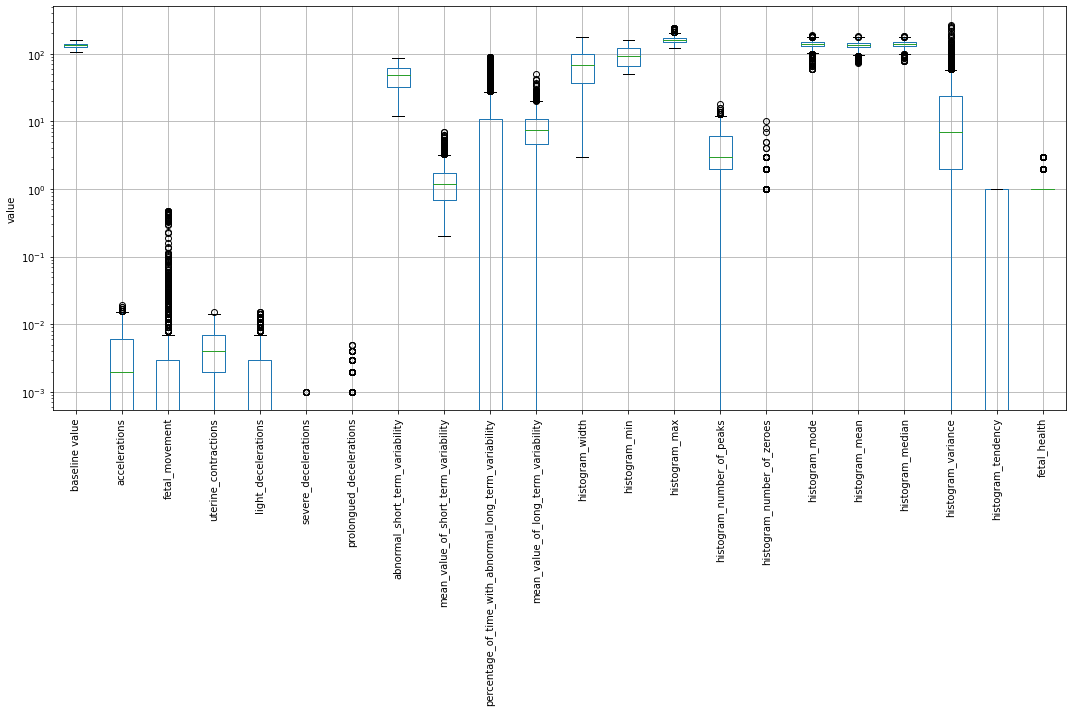

In [32]:
fig4 = plt.figure(figsize=(15,10))
df1.boxplot()
plt.ylabel("value")
plt.xticks(rotation=90)
plt.yscale("log")
plt.tight_layout()
print("\nBoxplots:")
plt.show()

In [33]:
X = df1.drop(['fetal_health'], axis=1)
y = df1['fetal_health']

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2,random_state=1)

sampler = SMOTE(random_state=0)

X_train_sampled, y_train_sampled = sampler.fit_sample(X_train, y_train)

print(X_train_sampled.shape, y_train_sampled.shape)

(3987, 21) (3987,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.8967
Precision: 0.8352
F1-score: 0.8336
Recall score: 0.8366


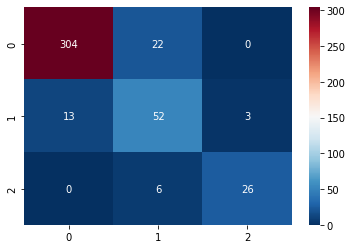

In [34]:
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train_sampled, y_train_sampled)

y_knn = clf_knn.predict(X_test)
print("Accuracy: %.4f" %clf_knn.score(X_test, y_test))
print("Precision: %.4f" %precision_score(y_test, y_knn, average='macro'))
print("F1-score: %.4f" %f1_score(y_test, y_knn, average='macro'))
print("Recall score: %.4f" %recall_score(y_test, y_knn, average='macro'))
cf_matrix = sns.heatmap(confusion_matrix(y_test, y_knn), cmap='RdBu_r',annot = True, fmt='')

In [35]:
22/326

0.06748466257668712

In [36]:
sum(confusion_matrix(y_test, y_knn))

array([317,  80,  29])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Accuracy: 0.9061
Precision: 0.8660
F1-score: 0.8217
Recall score: 0.7870


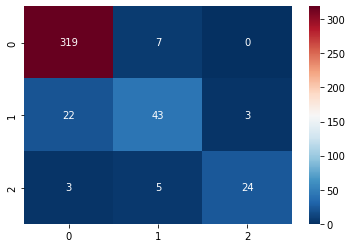

In [37]:
opt_knn = GridSearchCV(estimator=clf_knn, param_grid={"n_neighbors":[1,2,3,4,5,6,7]})
opt_knn.fit(X_train_sampled, y_train_sampled)

clf_knn_opt = opt_knn.best_estimator_
print(clf_knn_opt)
clf_knn_opt.fit(X_train, y_train)

y_knn_opt = clf_knn_opt.predict(X_test)
print("Accuracy: %.4f" %clf_knn_opt.score(X_test, y_test))
print("Precision: %.4f" %precision_score(y_test, y_knn_opt, average='macro'))
print("F1-score: %.4f" %f1_score(y_test, y_knn_opt, average='macro'))
print("Recall score: %.4f" %recall_score(y_test, y_knn_opt, average='macro'))
cf_matrix = sns.heatmap(confusion_matrix(y_test, y_knn_opt), cmap='RdBu_r',annot = True, fmt='')

Accuracy: 0.8592
Precision: 0.7443
F1-score: 0.7701
Recall score: 0.8092


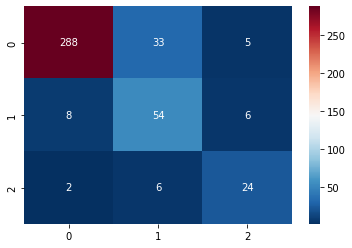

In [38]:
clf_lr = LogisticRegression(solver='liblinear')
clf_lr.fit(X_train_sampled, y_train_sampled)

y_lr = clf_lr.predict(X_test)
print("Accuracy: %.4f" %clf_lr.score(X_test, y_test))
print("Precision: %.4f" %precision_score(y_test, y_lr, average='macro'))
print("F1-score: %.4f" %f1_score(y_test, y_lr, average='macro'))
print("Recall score: %.4f" %recall_score(y_test, y_lr, average='macro'))
cf_matrix = sns.heatmap(confusion_matrix(y_test, y_lr), cmap='RdBu_r',annot = True, fmt='')

Accuracy: 0.8991
Precision: 0.8234
F1-score: 0.8380
Recall score: 0.8558


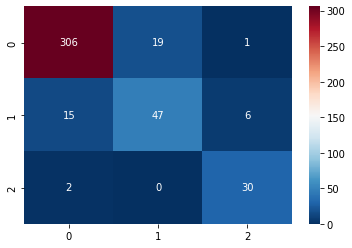

In [39]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_sampled, y_train_sampled)

y_dt = clf_dt.predict(X_test)
print("Accuracy: %.4f" %clf_dt.score(X_test, y_test))
print("Precision: %.4f" %precision_score(y_test, y_dt, average='macro'))
print("F1-score: %.4f" %f1_score(y_test, y_dt, average='macro'))
print("Recall score: %.4f" %recall_score(y_test, y_dt, average='macro'))
cf_matrix = sns.heatmap(confusion_matrix(y_test, y_dt), cmap='RdBu_r',annot = True, fmt='')

Accuracy: 0.8638
Precision: 0.7461
F1-score: 0.7795
Recall score: 0.8300


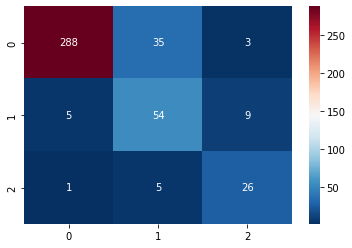

In [40]:
clf_svm = SVC(kernel='linear')
clf_svm.fit(X_train_sampled, y_train_sampled)

y_svm = clf_svm.predict(X_test)
print("Accuracy: %.4f" %clf_svm.score(X_test, y_test))
print("Precision: %.4f" %precision_score(y_test, y_svm, average='macro'))
print("F1-score: %.4f" %f1_score(y_test, y_svm, average='macro'))
print("Recall score: %.4f" %recall_score(y_test, y_svm, average='macro'))
cf_matrix = sns.heatmap(confusion_matrix(y_test, y_svm), cmap='RdBu_r',annot = True, fmt='')

In [41]:
df2 = pd.read_csv("./drive/MyDrive/portsmouth/gender_classification_v7.csv")
COLORS = ['#0000ff', '#ff0000']

In [42]:
df2.head()

long_hair  forehead_width_cm  ...  distance_nose_to_lip_long  gender
0          1               11.8  ...                          1    Male
1          0               14.0  ...                          0  Female
2          0               11.8  ...                          1    Male
3          0               14.4  ...                          1    Male
4          1               13.5  ...                          0  Female

[5 rows x 8 columns]

In [43]:
df2.describe()

long_hair  forehead_width_cm  ...    lips_thin  distance_nose_to_lip_long
count  5001.000000        5001.000000  ...  5001.000000                5001.000000
mean      0.869626          13.181484  ...     0.493101                   0.498900
std       0.336748           1.107128  ...     0.500002                   0.500049
min       0.000000          11.400000  ...     0.000000                   0.000000
25%       1.000000          12.200000  ...     0.000000                   0.000000
50%       1.000000          13.100000  ...     0.000000                   0.000000
75%       1.000000          14.000000  ...     1.000000                   1.000000
max       1.000000          15.500000  ...     1.000000                   1.000000

[8 rows x 7 columns]

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [45]:
df2[df2['gender'] == 'Female']

long_hair  forehead_width_cm  ...  distance_nose_to_lip_long  gender
1             0               14.0  ...                          0  Female
4             1               13.5  ...                          0  Female
7             0               13.0  ...                          0  Female
8             1               11.9  ...                          1  Female
9             1               12.1  ...                          0  Female
...         ...                ...  ...                        ...     ...
4993          1               11.6  ...                          1  Female
4996          1               13.6  ...                          0  Female
4997          1               11.9  ...                          0  Female
4998          1               12.9  ...                          0  Female
4999          1               13.2  ...                          0  Female

[2501 rows x 8 columns]


Label count:


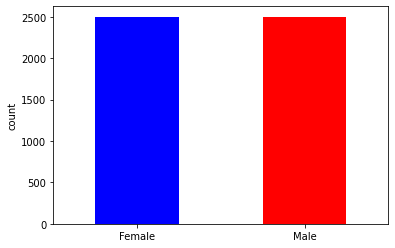


Boxplots:


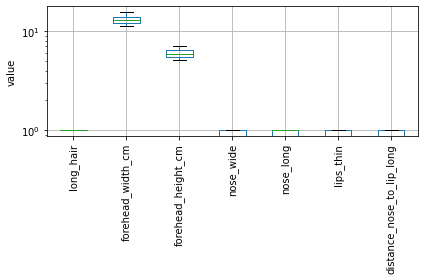

In [53]:
fig1 = plt.figure()
hist = df2['gender'].value_counts()
hist.plot(kind="bar", color=COLORS)
plt.ylabel("count")
plt.xticks(rotation=0)
print("\nLabel count:")
plt.show()

fig2 = plt.figure()
df2.boxplot()
plt.xticks(rotation=90)
plt.ylabel('value')
plt.yscale("log")
plt.tight_layout()
print("\nBoxplots:")
plt.show()

In [47]:
X = df2.drop(['gender'], axis=1)
y = df2['gender']

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)


In [48]:
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)

y_knn = clf_knn.predict(X_test)
# print(classification_report(y_test, y_knn))
# print(confusion_matrix(y_test, y_knn))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
Accuracy: 0.9710
Precision: 0.9714
F1-score: 0.9710
Recall score: 0.9709


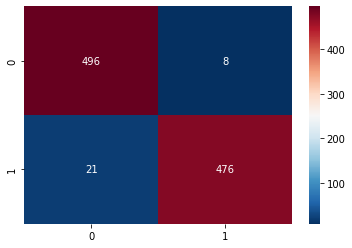

In [49]:
opt_knn = GridSearchCV(estimator=clf_knn, param_grid={"n_neighbors":[1,2,3,4,5,6,7, 8, 9]})
opt_knn.fit(X_train, y_train)

clf_knn_opt = opt_knn.best_estimator_
print(clf_knn_opt)
clf_knn_opt.fit(X_train, y_train)

y_knn_opt = clf_knn_opt.predict(X_test)
print("Accuracy: %.4f" %clf_knn_opt.score(X_test, y_test))
print("Precision: %.4f" %precision_score(y_test, y_knn_opt, average='macro'))
print("F1-score: %.4f" %f1_score(y_test, y_knn_opt, average='macro'))
print("Recall score: %.4f" %recall_score(y_test, y_knn_opt, average='macro'))
cf_matrix = sns.heatmap(confusion_matrix(y_test, y_knn_opt), cmap='RdBu_r',annot = True, fmt='')

Accuracy: 0.9520
Precision: 0.9524
F1-score: 0.9520
Recall score: 0.9520


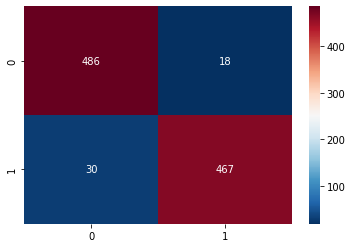

In [50]:
clf_lr = LogisticRegression(solver='liblinear')
clf_lr.fit(X_train, y_train)

y_lr = clf_lr.predict(X_test)
print("Accuracy: %.4f" %clf_lr.score(X_test, y_test))
print("Precision: %.4f" %precision_score(y_test, y_lr, average='macro'))
print("F1-score: %.4f" %f1_score(y_test, y_lr, average='macro'))
print("Recall score: %.4f" %recall_score(y_test, y_lr, average='macro'))
cf_matrix = sns.heatmap(confusion_matrix(y_test, y_lr), cmap='RdBu_r',annot = True, fmt='')

Accuracy: 0.9670
Precision: 0.9670
F1-score: 0.9670
Recall score: 0.9670


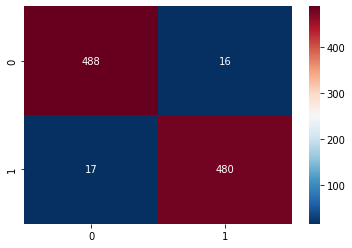

In [51]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

y_dt = clf_dt.predict(X_test)
print("Accuracy: %.4f" %clf_dt.score(X_test, y_test))
print("Precision: %.4f" %precision_score(y_test, y_dt, average='macro'))
print("F1-score: %.4f" %f1_score(y_test, y_dt, average='macro'))
print("Recall score: %.4f" %recall_score(y_test, y_dt, average='macro'))
cf_matrix = sns.heatmap(confusion_matrix(y_test, y_dt), cmap='RdBu_r',annot = True, fmt='')

Accuracy: 0.9650
Precision: 0.9650
F1-score: 0.9650
Recall score: 0.9651


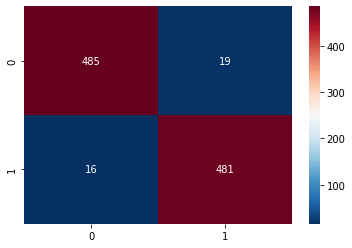

In [52]:
clf_svm = SVC(kernel='linear')
clf_svm.fit(X_train, y_train)

y_svm = clf_svm.predict(X_test)
print("Accuracy: %.4f" %clf_svm.score(X_test, y_test))
print("Precision: %.4f" %precision_score(y_test, y_svm, average='macro'))
print("F1-score: %.4f" %f1_score(y_test, y_svm, average='macro'))
print("Recall score: %.4f" %recall_score(y_test, y_svm, average='macro'))
cf_matrix = sns.heatmap(confusion_matrix(y_test, y_svm), cmap='RdBu_r',annot = True, fmt='')